In [8]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install yfinance
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install datetime

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from datetime import date,datetime,timedelta

pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")
import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.2/210.2 kB 11.4 MB/s eta 0:00:00


/var/folders/bc/qtnxfm1141qg_dqv2dlcr5880000gn/T/ipykernel_97751/982658382.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [9]:
end = "2023-03-10"
start = "2019-03-01"
symbol=['AAPL','MSFT','TSLA']
stock_data={}
for stock in symbol:
    stock_data[stock]= yf.download(stock,start,end, auto_adjust=True,ignore_tz=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


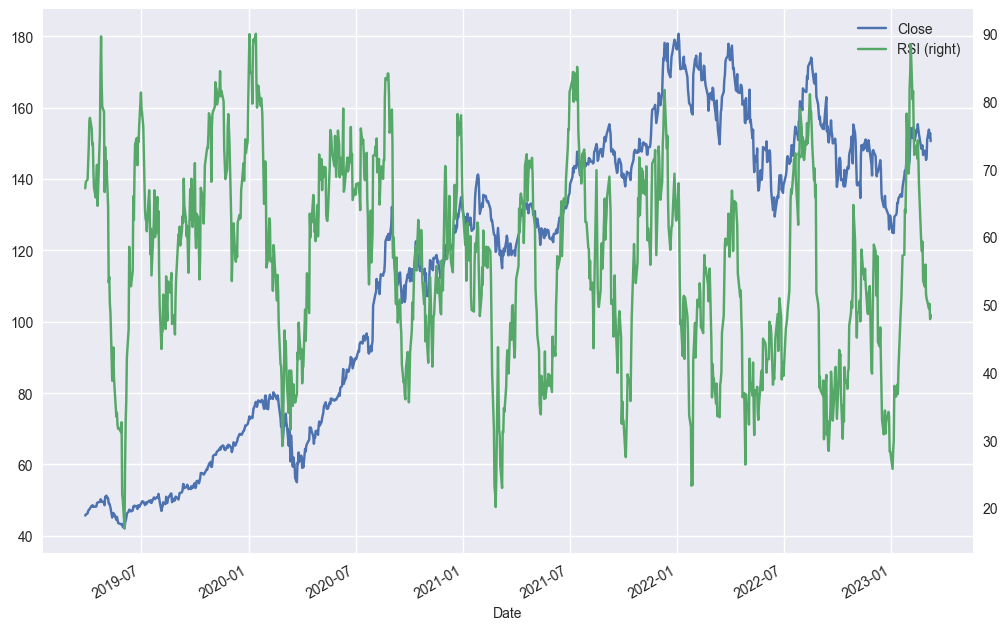

In [10]:
data=stock_data['AAPL']
data.Close.diff()
data["U"] = np.where(data.Close.diff() > 0, data.Close.diff(), 0)
data["D"] = np.where(data.Close.diff() < 0, -data.Close.diff(), 0)
periods = 20
data["MA_U"] = data.U.rolling(periods).mean()
data["MA_D"] = data.D.rolling(periods).mean()
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100
data.dropna(inplace = True)
data[["Close", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()

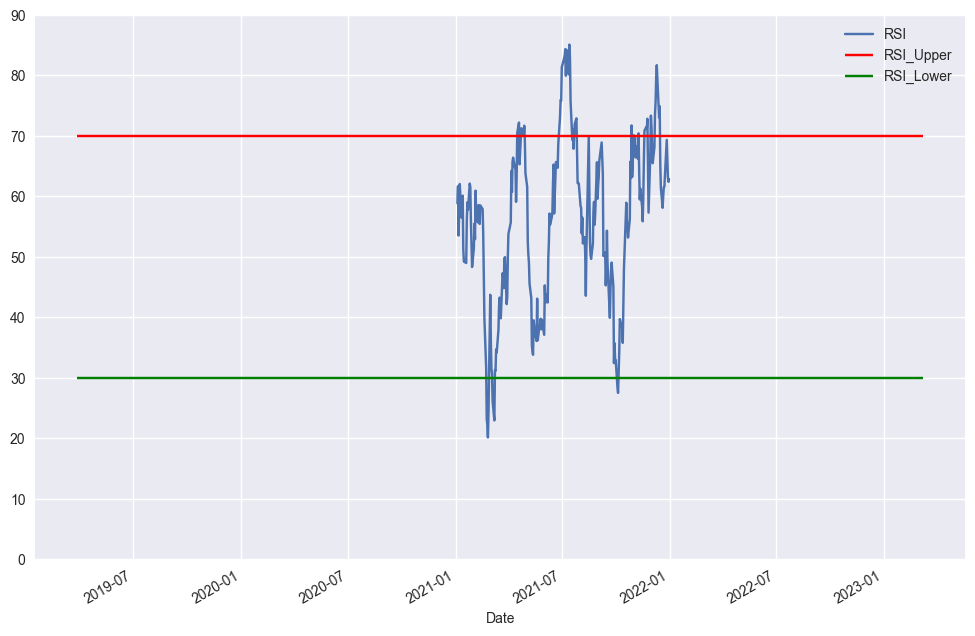

In [7]:
rsi_upper = 70
rsi_lower = 30
data.loc["2021", ["RSI"]].plot(figsize = (12, 8))
plt.hlines(y = rsi_upper, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Upper", color = "r")
plt.hlines(y = rsi_lower, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()